# 문제 1

#### dataset : pima-indians-diabetes-database [kaggle link](pima-indians-diabetes-database) - added post-processing
/kaggle/input/adpkrp5/data1.csv

### 1-1 탐색적 데이터 분석 수행(시각화 포함)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/adpkrp5/data1.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
# 혹시나 해서 한 번더
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# 기초통계량 확인
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,81.976562,20.536458,79.799479,44.934766,0.471876,34.447917,0.348958
std,3.369578,31.972618,358.835058,15.952218,115.244002,359.739733,0.331329,36.754727,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,9999.000000,99.000000,846.000000,9999.000000,2.420000,999.000000,1.000000


In [5]:
# BloodPressure, BMI, Age에 뭔가 이상치가 조금 있는 것 같음
# 0일 수가 없는데 그리고 9999는 뭐냐
# 상자그림을 그려봐야겠다.

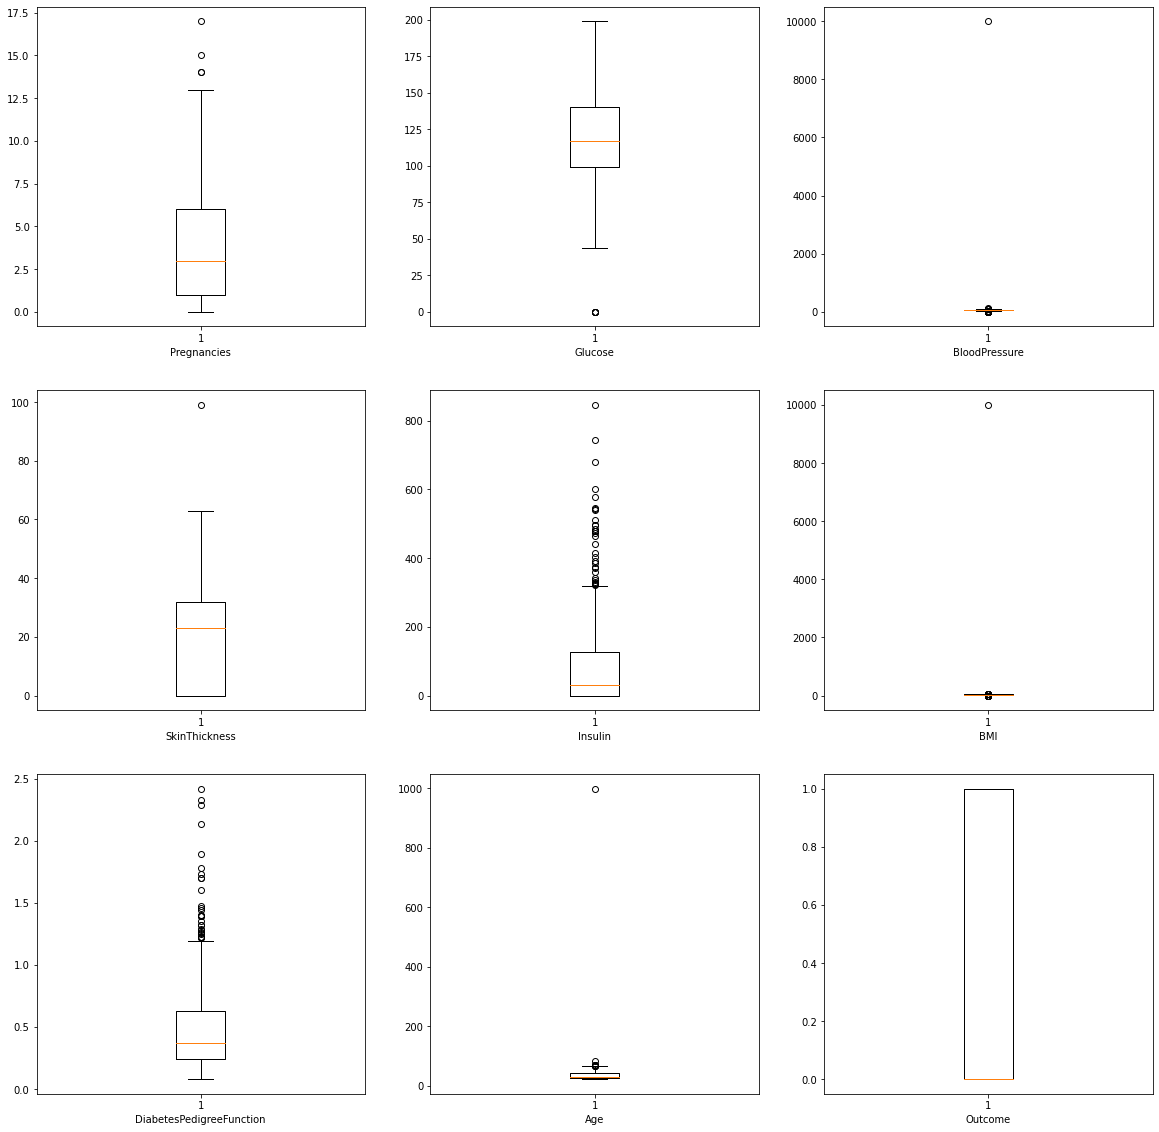

In [6]:
plt.figure(figsize = (20, 20))
plt.subplot(3, 3, 1)
plt.boxplot(df['Pregnancies'])
plt.xlabel('Pregnancies')

plt.subplot(3, 3, 2)
plt.boxplot(df['Glucose'])
plt.xlabel('Glucose')

plt.subplot(3, 3, 3)
plt.boxplot(df['BloodPressure'])
plt.xlabel('BloodPressure')

plt.subplot(3, 3, 4)
plt.boxplot(df['SkinThickness'])
plt.xlabel('SkinThickness')

plt.subplot(3, 3, 5)
plt.boxplot(df['Insulin'])
plt.xlabel('Insulin')

plt.subplot(3, 3, 6)
plt.boxplot(df['BMI'])
plt.xlabel('BMI')

plt.subplot(3, 3, 7)
plt.boxplot(df['DiabetesPedigreeFunction'])
plt.xlabel('DiabetesPedigreeFunction')

plt.subplot(3, 3, 8)
plt.boxplot(df['Age'])
plt.xlabel('Age')

plt.subplot(3, 3, 9)
plt.boxplot(df['Outcome'])
plt.xlabel('Outcome')

plt.show()

일단 이상치있는 건 확인했고, 처리는 1-2번에서 하자.
그리고 이번에는 상관관계를 확인하기 위해 상관계수 히트맵을 그린다.

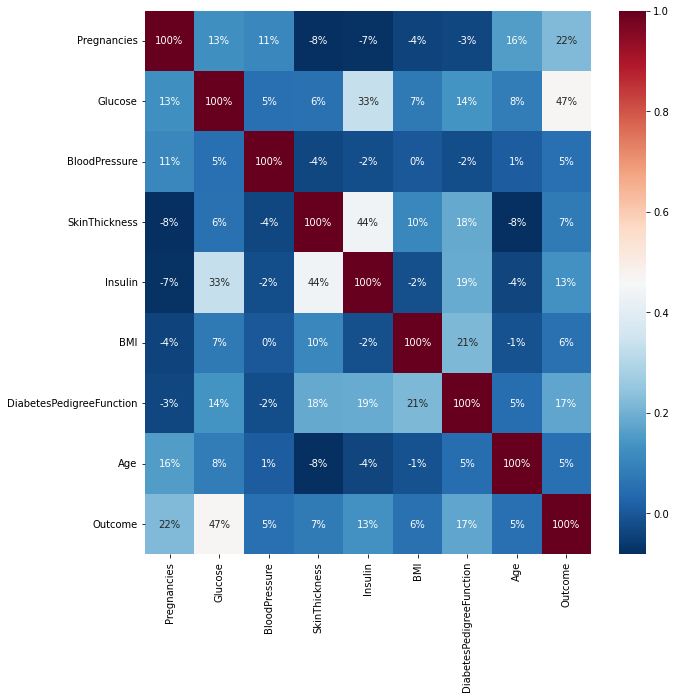

In [7]:
df_corr = df.corr(method = 'pearson')
plt.figure(figsize = (10, 10))
sns.heatmap(df_corr, cmap = 'RdBu_r', annot = True, fmt = '.0%')
plt.show()

상관관계가 큰 것은 보이지 않는다.

따라서 다중공선성은 의심하지 않아도 될 것 같다.

마지막으로 하나씩 히스토그램 그려보기

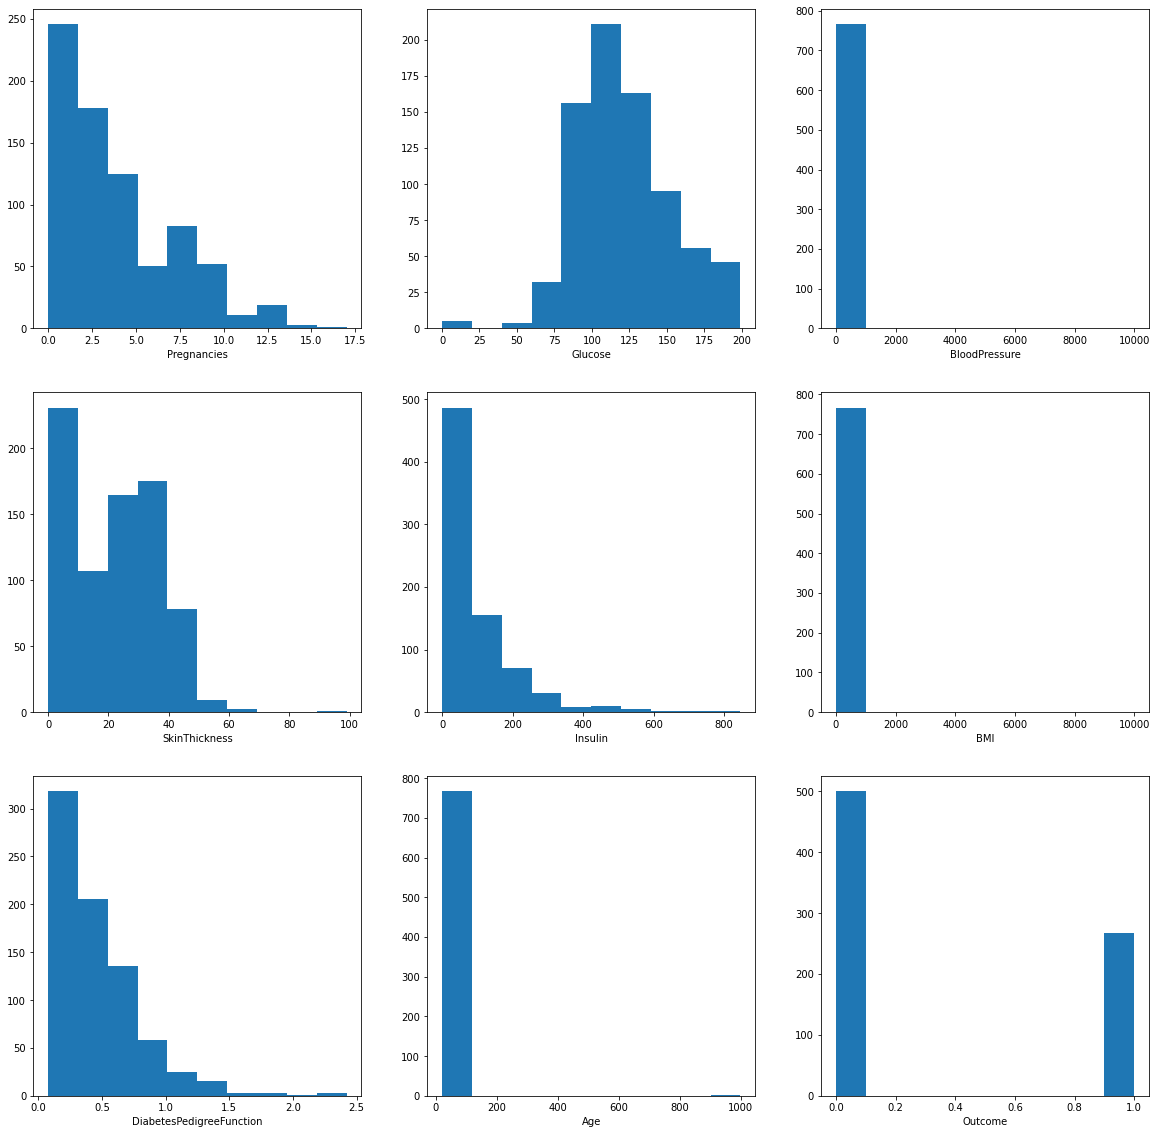

In [8]:
plt.figure(figsize = (20, 20))
for (col, i) in zip(df.columns, range(1, 10)):
    plt.subplot(3, 3, i)
    plt.hist(df[col])
    plt.xlabel(col)
plt.show()

### 1-2 이상치 처리(이상값 대체방안 제시)

* 데이터의 수가 매우 많고 이상치가 존재하는 행이 전체 데이터에 비해 많지 않은 경우 이상치가 존재하는 행 전체를 삭제할 수 있다.
* 만약 대체한다면 변수의 특징에 따라 평균, 중앙값, 최빈값과 같은 대푯값을 선정하여 대체할 수 있다.

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

이번에는 중앙값으로 대체하고자 한다.

이때, 이상치를 제외한 상태에서의 중앙값으로 대체하겠다.

수염 밖의 값까지 포함한 경우의 중앙값과 같은 경우도 있고, 다른 경우도 있다.

무튼 Outcome을 제외한 나머지 변수의 이상치를 수염 내의 값들에 대한 중앙값으로 대체해주자.

추가로, 각 피처별 값이 0인 경우가 말이 되지 않으므로 이것도 중앙값으로 대체해주자.

In [10]:
q1_series = df.describe().loc['25%']
median_series = df.describe().loc['50%']
q3_series = df.describe().loc['75%']
iqr_series = q3_series - q1_series

low_whis_series = q1_series - 1.5 * iqr_series
upper_whis_series = q3_series + 1.5 * iqr_series

df_for_0 = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]
df_for_999 = df[['BloodPressure', 'BMI', 'Age']]

print(median_series)

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
Name: 50%, dtype: float64


In [11]:
for col in df_for_0.columns:
    df.loc[df[col] == 0, [col]] = median_series[col]

for col in df_for_999.columns:
    df.loc[(df[col] == 999) | (df[col] == 9999), [col]] = median_series[col]

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.332031,27.334635,94.652344,32.415234,0.471876,33.184896,0.348958
std,3.369578,30.438286,12.002843,9.229014,105.547598,6.806084,0.331329,11.677531,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.525000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


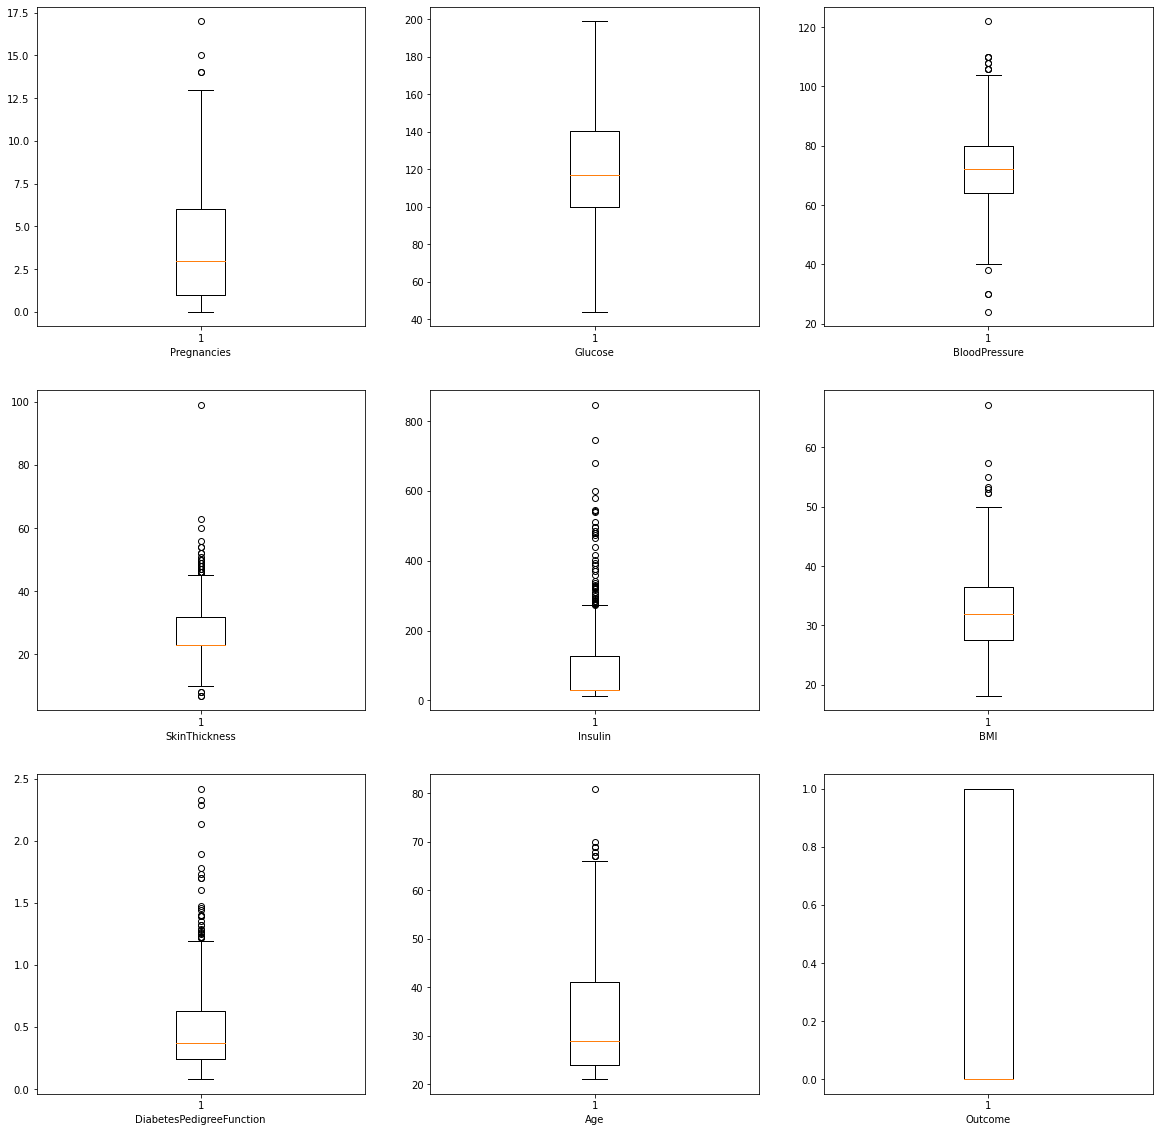

In [12]:
# 다시 그리는 상자그림
plt.figure(figsize = (20, 20))
plt.subplot(3, 3, 1)
plt.boxplot(df['Pregnancies'])
plt.xlabel('Pregnancies')

plt.subplot(3, 3, 2)
plt.boxplot(df['Glucose'])
plt.xlabel('Glucose')

plt.subplot(3, 3, 3)
plt.boxplot(df['BloodPressure'])
plt.xlabel('BloodPressure')

plt.subplot(3, 3, 4)
plt.boxplot(df['SkinThickness'])
plt.xlabel('SkinThickness')

plt.subplot(3, 3, 5)
plt.boxplot(df['Insulin'])
plt.xlabel('Insulin')

plt.subplot(3, 3, 6)
plt.boxplot(df['BMI'])
plt.xlabel('BMI')

plt.subplot(3, 3, 7)
plt.boxplot(df['DiabetesPedigreeFunction'])
plt.xlabel('DiabetesPedigreeFunction')

plt.subplot(3, 3, 8)
plt.boxplot(df['Age'])
plt.xlabel('Age')

plt.subplot(3, 3, 9)
plt.boxplot(df['Outcome'])
plt.xlabel('Outcome')

plt.show()

### 1-3 앞선 두 단계에서 얻은 향후 분석시 고려사항 작성

* 혈압이 24일 수 있는지 현업의 전문가와 논의 후 처리가 필요하다.
* 이외에도 SkinThickness, Insulin, BMI, DiabetesPedigreeFunction에 대해서는 전문가와 논의 후 처리가 필요해보인다.
* 상관계수가 큰 피처들이 존재하지 않으므로 다중공선성을 배제하기 위한 처리는 필요하지 않아 보인다.

# 문제 2

### 2-1 오버샘플링 과정 설명하고 결과 작성

 * 오버 샘플링 기법은 비중이 적은 데이터를 추가로 생성해 수를 늘려 데이터 불균형을 극복하는 기법이다.
    * 언더 샘플링은 데이터 손실의 문제로 예측 성능이 저하되는 단점이 있으므로, 일반적으로는 불균형한 데이터를 처리하는 방식으로 오버 샘플링을 사용한다.

 * 이때, 오버 샘플링은 Random Oversampling과 SMOTE로 구분할 수 있는데,

> Random Oversampling은
* 소수 클래스에 속하는 데이터의 관측치를 복사하는 방식으로 데이터를 증식한다.
* 데이터를 단순 복사하는 방식이므로 기존의 데이터와 동일한 복제 데이터를 생성한다.
* 이에 따라 소수 클래스에 과적합이 발생할 가능성이 있다는 단점이 있지만, 사용방법이 간단하다는 장점이 있다.

> 한편, SMOTE는
* 적은 데이터 세트에 있는 개별 데이터들의 k-최근접 이웃을 찾아, 해당 데이터와 k개 이웃들의 차이를 일정한 값으로 만들어 기존 데이터와 약간의 차이를 지닌 새로운 데이터를 생성하는 방식이다.
* SMOTE는 Random Oversampling보다 처리 속도가 느리다는 단점이 잇지만, 데이터를 단순히 동일하게 증식시키는 방식이 아니기 때문에, 과적합 문제를 예방할 수 있는 장점이 있다.

일단 이번에는 Random Oversampling을 선정한다.

In [13]:
# 종속변수인 Class에 대하여 Random Oversamplig
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 731)

y=df.pop('Outcome')
x=df

import time
# Random Oversampling
ros_start_time = time.time() # 시작 시간
x_ros, y_ros = ros.fit_resample(x, y)
ros_end_time = time.time() # 종료 시간
print('ros_time : ', ros_end_time - ros_start_time)

ros_time :  0.0058710575103759766


### 2-2 언더샘플링 과정 설명하고 결과 작성

종속변수에 대하여 상대적으로 빈도가 작은 변수에 맞춰주는 것이다,.

In [14]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 731)

# Random Oversampling
rus_start_time = time.time() # 시작 시간
x_rus, y_rus = rus.fit_resample(x, y)
rus_end_time = time.time() # 종료 시간
print('rus_time : ', rus_end_time - rus_start_time)

rus_time :  0.0070154666900634766


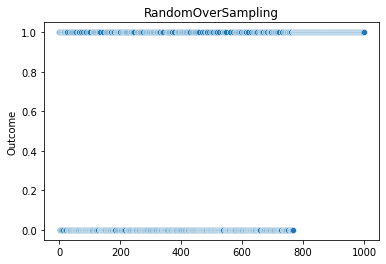

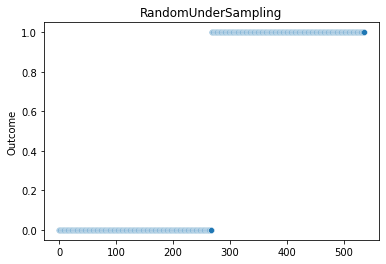

(1000,) (536,)


In [15]:
sns.scatterplot(data = y_ros)
plt.title('RandomOverSampling')
plt.show()

sns.scatterplot(data = y_rus)
plt.title('RandomUnderSampling')
plt.show()

print(y_ros.shape, y_rus.shape)

### 2-3 둘 중 선택하고 이유 설명

오버샘플링을 선택한다.
데이터가 부족한 것 보다는 충분한 것이 좋다.

# 문제 3

### 3-1 최소 3개 이상 알고리즘 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 꼭 구현(총 2개 이상)

### 3-2 모델 비교하고 결과 설명

### 3-3 속도 개선을 위한 차원 축소 설명하고 수행, 예측 성능과 속도 비교하고 결과 작성

# 문제 4 
금속 성분 함유량 데이터(변수 1개) - 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 보고 있는데 제조사별로 차이가 난다고 제보를 받았으며, 분산에 대해 검정을 수행하시오. (유의확률 0.05)

#### dataset : /kaggle/input/adpkrp5/content.csv

### 4-1 연구가설과 귀무가설 작성

### 4-2 양측 검정

### 4-3 검정통계량, 가설 채택

# 문제 5
Lot별 200개에 대한 불량 제품 수량 데이터(변수 2개 - lot번호, 불량제품수)    
/kaggle/input/adpkrp5/error.csv

### 5-1 불량률 관리도에 따라 관리중심선(CL : Center Line), 관리 상한선(UCL : Upper Control Limit), 하한선(LCL : Lower Control Limit) 구하기

### 5-2 관리도 시각화

# 문제 6
상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 한다. aa bb aaaa bbbb a b aa bb aa bbb aa bb a b 구매하는 패턴으로 보아 두 상품이 연관이 있는지 확인하라

### 6-1 연구가설과 귀무가설 작성

### 6-2 평균과 표준편차

### 6-3 가설 채택